# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
full_data = pd.merge(study_results,mouse_metadata, how="left", on = ["Mouse ID"])
# Display the data table for preview
full_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
unique_mice = len(full_data["Mouse ID"].unique())
unique_mice 

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = full_data[full_data.duplicated()]["Mouse ID"].unique()
duplicates

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_all = full_data.loc[full_data["Mouse ID"] == "g989",:]
duplicates_all

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = full_data.drop(full_data[full_data["Mouse ID"]=="g989"].index)
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mice_check = len(clean_data["Mouse ID"].unique())
unique_mice_check

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

select_column = clean_data.loc[:,["Drug Regimen","Tumor Volume (mm3)"]]
groupby = select_column.groupby(["Drug Regimen"])
mean = groupby["Tumor Volume (mm3)"].mean()
median = groupby["Tumor Volume (mm3)"].median()
variance = groupby["Tumor Volume (mm3)"].var()
sd = groupby["Tumor Volume (mm3)"].std()
SEM = groupby["Tumor Volume (mm3)"].sem()
summary = pd.DataFrame({
                        "Mean Tumor Volume": mean,
                        "Median Tumor Volume": median,
                        "Tumor Volume Variance": variance,
                        "Tumor Volume Std. Dev.": sd,
                        "Tumor Volume Std. Err.": SEM})
summary.head()


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

aggregation_summary = select_column.groupby(["Drug Regimen"]).agg(['mean','median','var',"std","sem"])
aggregation_summary.head()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Ceftamin'),
  Text(8, 0, 'Infubinol'),
  Text(9, 0, 'Propriva')])

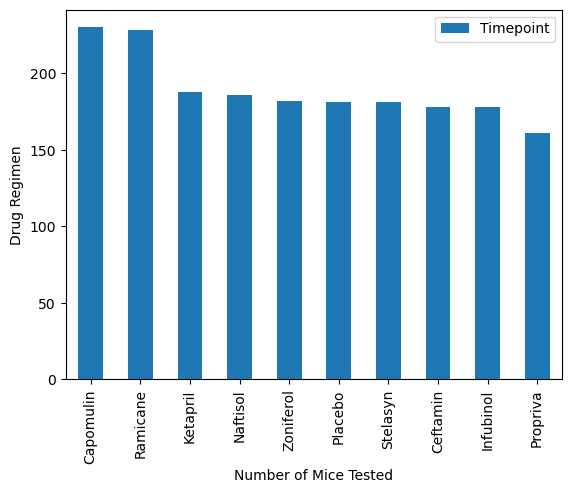

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# create a dataframe including the total number of timepoints and group by drug regimen
select_timepoints = full_data[["Drug Regimen","Timepoint"]]
groupby_timepoints = select_timepoints.groupby("Drug Regimen").agg("count")
groupby_timepoints = groupby_timepoints.sort_values("Timepoint", ascending = False)

# generate the graph
groupby_timepoints.plot(kind = "bar")

# generate x, y value
x_axis = groupby_timepoints.index.tolist()
y_axis = groupby_timepoints["Timepoint"].tolist()

# generate x, y label
plt.xlabel("Number of Mice Tested")
plt.ylabel("Drug Regimen")
plt.xticks(rotation=90)




<BarContainer object of 10 artists>

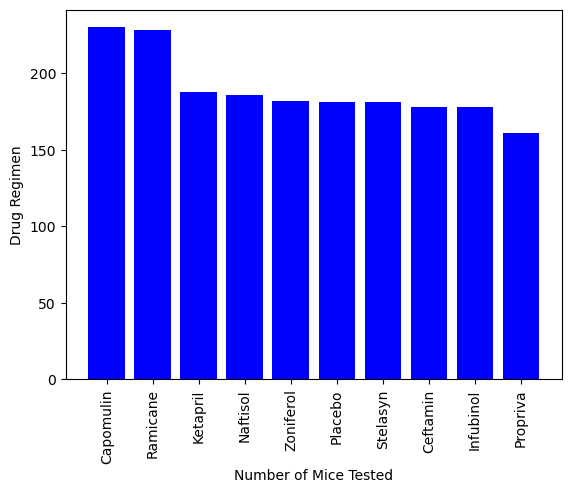

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# create a dataframe including the total number of timepoints and group by drug regimen
select_timepoints = full_data[["Drug Regimen","Timepoint"]]
groupby_timepoints = select_timepoints.groupby("Drug Regimen").agg("count")
groupby_timepoints = groupby_timepoints.sort_values("Timepoint", ascending = False)

# generate x, y value
x_axis = groupby_timepoints.index.tolist()
y_axis = groupby_timepoints["Timepoint"].tolist()

# generate x, y label
plt.xlabel("Number of Mice Tested")
plt.ylabel("Drug Regimen")
plt.xticks(rotation=90)

# generate the graph
plt.bar(x_axis, y_axis, color = "b", align = "center")

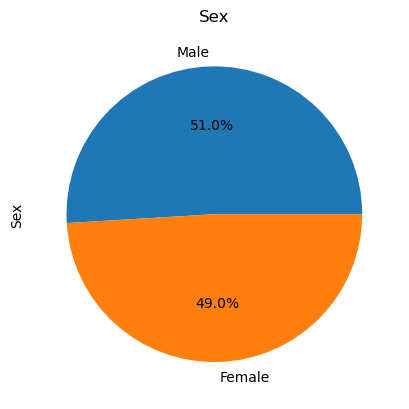

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#labels for the pie chart

counts = clean_data["Sex"].value_counts()
counts.plot(kind="pie", autopct = "%1.1f%%")
plt.title("Sex")
plt.show()

([<matplotlib.patches.Wedge at 0x7fa72d3fb550>,
 [Text(-0.6814042419013431, -0.8635324308437154, 'Male'),
  Text(0.6814042419013431, 0.8635324308437154, 'Female')],
 [Text(-0.3716750410370962, -0.47101768955111745, '51.0%'),
  Text(0.3716750410370962, 0.47101768955111745, '49.0%')])

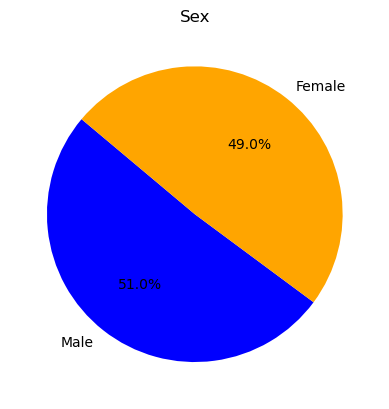

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#labels for the pie chart

total_count  = len(clean_data["Sex"])
female_count = clean_data["Sex"].value_counts()["Female"]
female_count_pct = female_count / total_count
male_count_pct = 1 - female_count_pct



#create label and color for the pie chart
labels = ["Male", "Female"]
sizes = [male_count_pct, female_count_pct]
colors = ["blue", "orange"]

plt.title("Sex")

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140)



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max = study_results.groupby("Mouse ID").agg({"Timepoint":"max", "Tumor Volume (mm3)": "last"})

max

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

combine = pd.merge(mouse_metadata,max, how="left", on = ["Mouse ID"])

combine = combine.loc[combine["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]),:]

combine.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,Male,21,16,45,22.050126
1,s185,Capomulin,Female,3,17,45,23.343598
2,x401,Capomulin,Female,16,15,45,28.484033
3,m601,Capomulin,Male,22,17,45,28.430964
4,g791,Ramicane,Male,11,16,45,29.128472


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vols = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 

capomulin = combine.loc[combine["Drug Regimen"] == "Capomulin"]
capomulin = capomulin[["Mouse ID", "Tumor Volume (mm3)"]]

ramicane = combine.loc[combine["Drug Regimen"] == "Ramicane"]
ramicane = ramicane[["Mouse ID", "Tumor Volume (mm3)"]]

infubinol = combine.loc[combine["Drug Regimen"] == "Infubinol"]
infubinol = infubinol[["Mouse ID", "Tumor Volume (mm3)"]]

ceftamin = combine.loc[combine["Drug Regimen"] == "Ceftamin"]
ceftamin = ceftamin[["Mouse ID", "Tumor Volume (mm3)"]]

    
    # Determine outliers using upper and lower bounds

quantiles1 = capomulin["Tumor Volume (mm3)"].quantile([.25, .5, .75])
lowerq1 = quantiles1[0.25]
upperq1 = quantiles1[0.75]
iqr1= upperq1 - lowerq1
lower_bound1 = lowerq1 - (1.5 * iqr1)
higher_bound1 = upperq1 + (1.5 * iqr1)
outlier1 = capomulin.loc[(capomulin["Tumor Volume (mm3)"] > higher_bound1) | (capomulin["Tumor Volume (mm3)"] < lower_bound1), :]

quantiles2 = ramicane["Tumor Volume (mm3)"].quantile([.25, .5, .75])
lowerq2= quantiles2[0.25]
upperq2 = quantiles2[0.75]
iqr2 = upperq2 - lowerq2
lower_bound2 = lowerq2 - (1.5 * iqr2)
higher_bound2 = upperq2 + (1.5 * iqr2)
outlier2 = ramicane.loc[(ramicane["Tumor Volume (mm3)"] > higher_bound2) | (ramicane["Tumor Volume (mm3)"] < lower_bound2), :]

quantiles3 = infubinol["Tumor Volume (mm3)"].quantile([.25, .5, .75])
lowerq3 = quantiles3[0.25]
upperq3 = quantiles3[0.75]
iqr3 = upperq3 - lowerq3
lower_bound3 = lowerq3 - (1.5 * iqr3)
higher_bound3 = upperq3 + (1.5 * iqr3)
outlier3 = infubinol.loc[(infubinol["Tumor Volume (mm3)"] > higher_bound3) | (infubinol["Tumor Volume (mm3)"] < lower_bound3), :]

quantiles4 = ceftamin["Tumor Volume (mm3)"].quantile([.25, .5, .75])
lowerq4 = quantiles4[0.25]
upperq4 = quantiles4[0.75]
iqr4 = upperq4 - lowerq4
lower_bound4 = lowerq4 - (1.5 * iqr4)
higher_bound4 = upperq4 + (1.5 * iqr4)
outlier4 = ceftamin.loc[(ceftamin["Tumor Volume (mm3)"] > higher_bound4) | (ceftamin["Tumor Volume (mm3)"] < lower_bound4), :]

print(f"Capomulin's potential outliers: {outlier1}")
print(f"Ramicane's potential outliers: {outlier2}")
print(f"Infubinol's potential outliers: {outlier3}")
print(f"Ceftamin's potential outliers: {outlier4}")


# Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
# Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
# Infubinol's potential outliers: 31    36.321346
# Name: Tumor Volume (mm3), dtype: float64
# Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Capomulin's potential outliers: Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []
Ramicane's potential outliers: Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []
Infubinol's potential outliers:    Mouse ID  Tumor Volume (mm3)
74     c326           36.321346
Ceftamin's potential outliers: Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []


/var/folders/hc/n_bw_j2n4xd6nj7mvtb4bvcm0000gn/T/ipykernel_3680/3957053039.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatment)


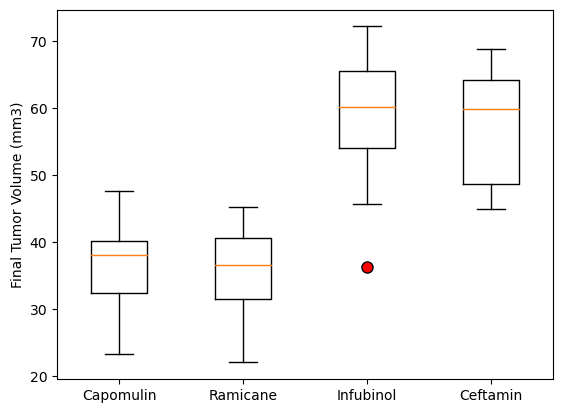

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_xticklabels(treatment)
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot([capomulin["Tumor Volume (mm3)"], ramicane["Tumor Volume (mm3)"],infubinol["Tumor Volume (mm3)"],ceftamin["Tumor Volume (mm3)"]],
            flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8})

plt.show()


## Line and Scatter Plots

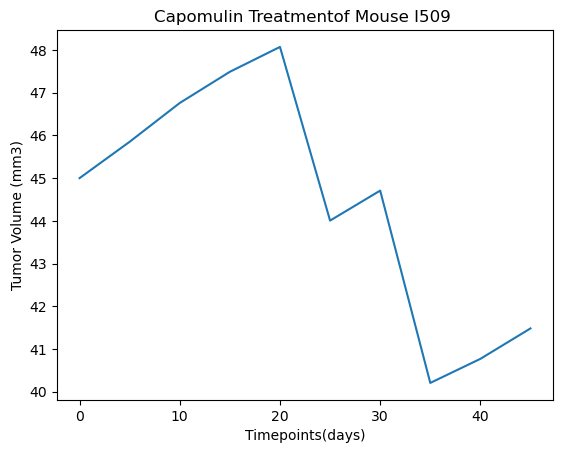

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

line_data = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin") & (clean_data["Mouse ID"] == "l509"),:]

line_data.head()

y_axis = line_data["Tumor Volume (mm3)"]
x_axis = line_data["Timepoint"]
plt.xlabel("Timepoints(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatmentof Mouse I509 ")


plt.plot(x_axis, y_axis)
plt.show()



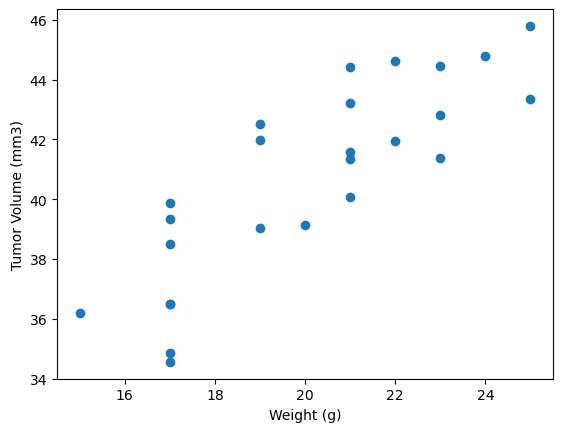

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

scatter_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
scatter_data = scatter_data.groupby(["Mouse ID"]).agg({"Weight (g)":"mean", "Tumor Volume (mm3)": "mean"})
scatter_data

x_axis = scatter_data["Weight (g)"]
y_axis = scatter_data["Tumor Volume (mm3)"]

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.scatter(x_axis, y_axis)

plt.show()


## Correlation and Regression

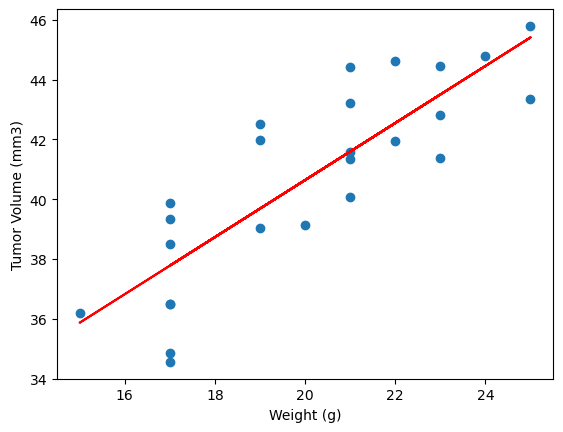

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

from scipy.stats import linregress

scatter_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
scatter_data = scatter_data.groupby(["Mouse ID"]).agg({"Weight (g)":"mean", "Tumor Volume (mm3)": "mean"})
scatter_data

x_axis = scatter_data["Weight (g)"]
y_axis = scatter_data["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_value = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_value,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()
